<a href="https://colab.research.google.com/github/VishalGaurav1/Walmart_EDA/blob/main/Walmart_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! gdown --id 1AHNQh42_P4gt2OzR6LK-91uy4X70OZps

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1AHNQh42_P4gt2OzR6LK-91uy4X70OZps
To: /content/walmart_latest.csv
100% 23.6M/23.6M [00:00<00:00, 154MB/s] 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
walmart=pd.read_csv('walmart_latest.csv')
walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
walmart.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [6]:
walmart.shape

(550068, 10)

In [7]:
walmart.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [8]:
#order of product_categories w.r.t. tot_users
df1=walmart.groupby('Product_Category')['User_ID'].count().reset_index(name='tot_users')
df1.sort_values(by='tot_users',ascending=False)

,Product_Category,tot_users
4,5,150933
0,1,140378
7,8,113925
10,11,24287
1,2,23864
5,6,20466
2,3,20213
3,4,11753
15,16,9828
14,15,6290


In [9]:
#top 3 products in each product_category
df=walmart.groupby(['Product_Category','Product_ID'])['User_ID'].count().reset_index(name='tot_users')
df['desnse_rank']=(df.groupby('Product_Category')['tot_users'].rank(method='dense',ascending=False).astype(int))
df1=df[df['desnse_rank']<=3]
df1.sort_values(by=['Product_Category','desnse_rank'],ascending=[True,True])

,Product_Category,Product_ID,tot_users,desnse_rank
31,1,P00025442,1615,1
129,1,P00110742,1612,2
135,1,P00112142,1562,3
604,2,P00277642,989,1
535,2,P00116842,979,2
610,2,P00295942,972,3
645,3,P00000142,1152,1
696,3,P00216342,943,2
710,3,P00289942,850,3
757,4,P00102642,1246,1


In [10]:
walmart.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

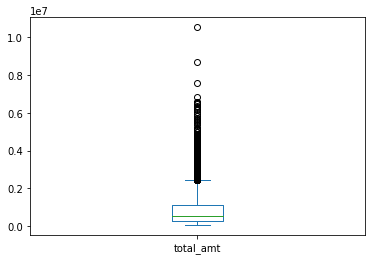

In [11]:
#checking the outliers for the purchase
walmart1=walmart.groupby('User_ID')['Purchase'].sum().reset_index(name='total_amt')
df1=walmart[['User_ID', 'Gender']].drop_duplicates()
df2=pd.merge(df1,walmart1,on='User_ID',how='inner')
df2['total_amt'].plot.box()


In [29]:
dff=walmart.groupby(['User_ID','Age','Marital_Status']).size().reset_index(name='tot_users')
dff.groupby(['Age','Marital_Status']).size()*100/dff.groupby('Age').size()
#0-Unmarried,1-Married

Age    Marital_Status
0-17   0                 100.000000
18-25  0                  77.174930
       1                  22.825070
26-35  0                  60.594252
       1                  39.405748
36-45  0                  60.411311
       1                  39.588689
46-50  0                  29.378531
       1                  70.621469
51-55  0                  28.274428
       1                  71.725572
55+    0                  35.752688
       1                  64.247312
dtype: float64

Comparison of purchase amount for males and females

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


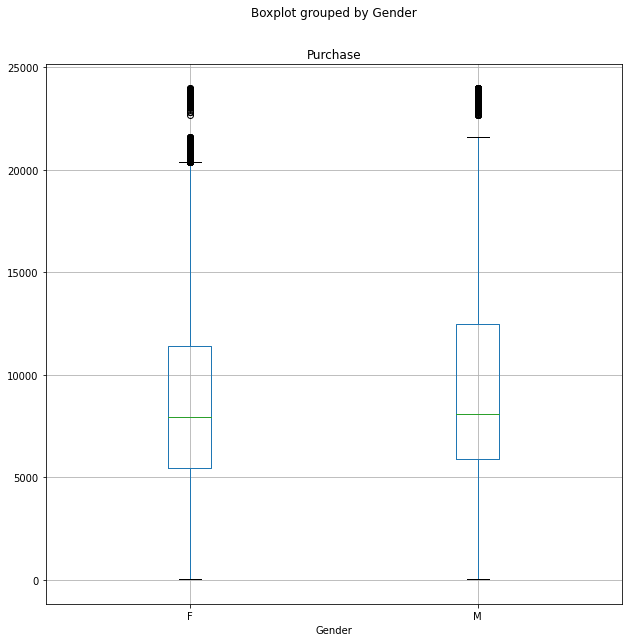

In [12]:
walmart.boxplot(by='Gender',column='Purchase',figsize=(10,10))

Comparison of puchase amount for married and unmarried persons

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


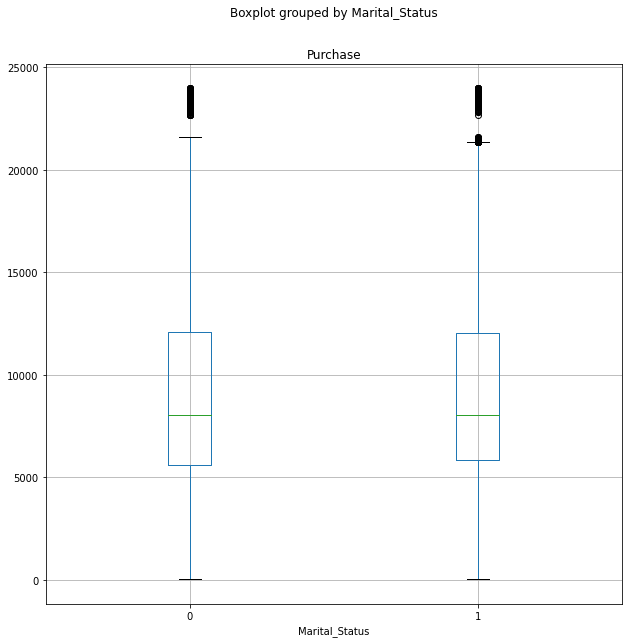

In [13]:
walmart.boxplot(by='Marital_Status',column='Purchase',figsize=(10,10))

Comaparison of purchase amount for different age-groups

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


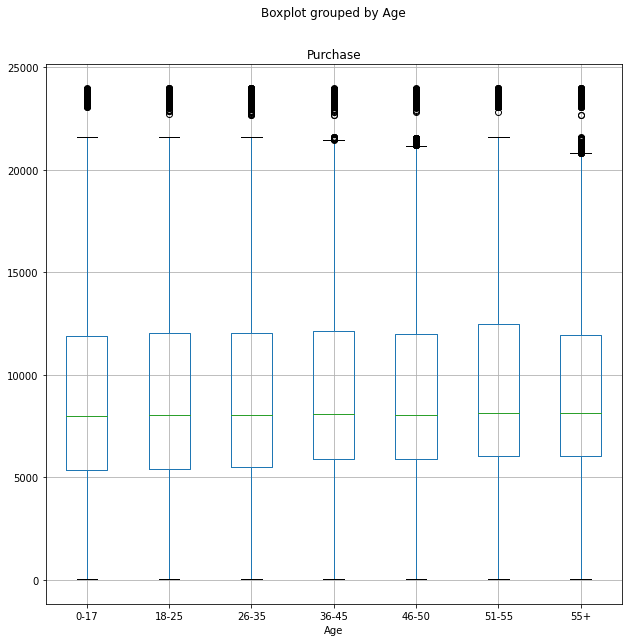

In [14]:

walmart.boxplot(by='Age',column='Purchase',figsize=(10,10))

Comparison of purchase amount for different Occupations

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


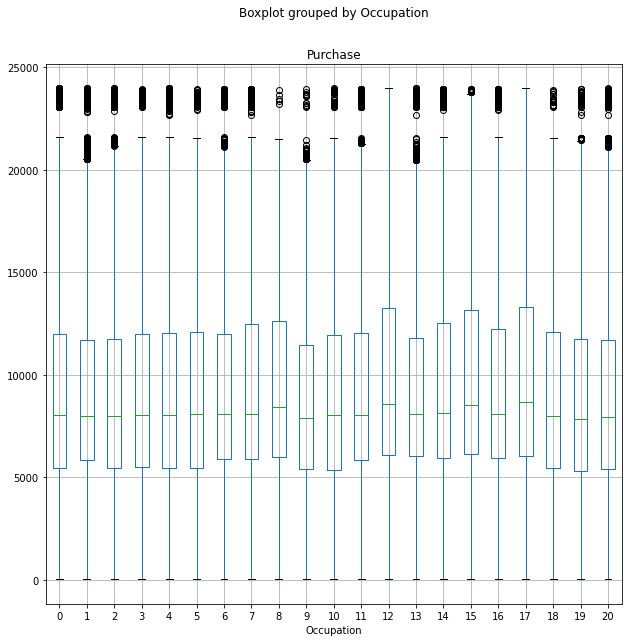

In [15]:
walmart.boxplot(by='Occupation',column='Purchase',figsize=(10,10))

Hypothesis_test to find whether the avg_male_purchases varies from the avg_female_purchases

In [16]:
#H0-mu_male_purcase=mu_female_purchase
#Ha-mu_male_purcase!=mu_female_purchase

In [17]:
walmart.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [22]:
from scipy import stats
males=walmart[walmart['Gender']=='M']
fem=walmart[walmart['Gender']=='F']
sam_male=np.random.choice(males['Purchase'],size=1000)
sam_female=np.random.choice(fem['Purchase'],size=1000)

In [23]:
alpha=0.05
t_stats,pval=stats.ttest_ind(sam_male,sam_female,equal_var=False)

In [24]:
if pval<alpha:
  print('reject null ypothesis')
else:
  print('cant reject null ypothesis')
#conclusion-mean_male_purcase_amnt is different from the mu_fem_purchase_amnt

reject null ypothesis


In [25]:
#confidence interval
mu_males=np.mean(sam_male)
mu_fem=np.mean(sam_female)
std_males=np.std(sam_male)
std_fem=np.std(sam_female)
z=std_males**2/1000+std_fem**2/1000
se=np.sqrt(z)
mu_diff=mu_males-mu_fem
ci=(mu_diff-2*se,mu_diff+2*se)
ci

(304.3173130649662, 1187.4446869350327)

Hypothesis test to confirm whether the mean_purchase_amt_married not equal to mean_purchase_unmarried

In [26]:
#H0-mu_married_purcase=mu_unmarried_purchase
#Ha-mu_married_purcase!=mu_unmarried_purchase

In [27]:
walmart.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [28]:
married=walmart[walmart['Marital_Status']==0]
unmarried=walmart[walmart['Marital_Status']==1]
sm_married=np.random.choice(married['Purchase'],size=1000)
sm_unmarried=np.random.choice(unmarried['Purchase'],size=1000)

In [30]:
alpha=0.05
t_stats,pval=stats.ttest_ind(sm_married,sm_unmarried,equal_var=False)

In [31]:
if pval<alpha:
  print('reject null ypothesis')
else:
  print('cant reject null ypothesis')
#conclusion-mean_married_purcase_amnt is equal to mu_unmarried_purchase_amnt

cant reject null ypothesis


In [33]:
#confidence interval
mu_married=np.mean(sm_married)
mu_unmarried=np.mean(sm_unmarried)
std_married=np.std(sm_married)
std_unmarried=np.std(sm_unmarried)
z=std_married**2/1000+std_unmarried**2/1000
se=np.sqrt(z)
mu_diff=mu_married-mu_unmarried
ci=(mu_diff-2*se,mu_diff+2*se)
ci

(-201.2732730214555, 661.0092730214526)

ONEWAY_ANOA to test whether atleast one group has a different mean_purchase_amt

In [34]:
#H0-mean_purchase_amt for all age_groups are same
#Ha-atleast one group has a different mean_purchase_amnt

Checking for normality of user purchase amt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


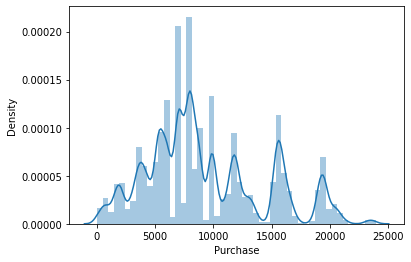

In [35]:
sns.distplot(walmart['Purchase'])

In [36]:
#Shapiro wilk test to test normality assumption
#H0-PURCHASE AMT AT USER LEVEL FOLLOWS normality assumption
#Ha-PURCHASE AMT AT USER LEVEL does not  FOLLOW normality assumption
from scipy.stats import shapiro
w,p_val=shapiro(walmart['Purchase'])

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [37]:
p_val

0.0

In [38]:
walmart.groupby('Age').size()

Age
0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
dtype: int64

In [39]:
#Levene test for equality of variance
#H0-for all age grps,variance of purchase amt is same
#Ha-atleast one age grp haas a diff variance
from scipy.stats import levene
tstat,pval=levene(walmart[walmart['Age']=='0-17']['Purchase'].sample(1000),
                  walmart[walmart['Age']=='18-25']['Purchase'].sample(1000),
                  walmart[walmart['Age']=='26-35']['Purchase'].sample(1000),
                  walmart[walmart['Age']=='36-45']['Purchase'].sample(1000),
                  walmart[walmart['Age']=='46-50']['Purchase'].sample(1000),
                  walmart[walmart['Age']=='51-55']['Purchase'].sample(1000),
                  walmart[walmart['Age']=='55+']['Purchase'].sample(1000))

In [40]:
pval

0.07170520373682453

In [41]:
#Performing ANOVA
#H0-mu_purchase_amt for all age grps is same
#Ha-atleast one age grp has a diff mean_purchase_amt
from scipy.stats import f_oneway
x,pval=f_oneway(walmart[walmart['Age']=='0-17']['Purchase'].sample(10000),
                  walmart[walmart['Age']=='18-25']['Purchase'].sample(10000),
                  walmart[walmart['Age']=='26-35']['Purchase'].sample(10000),
                  walmart[walmart['Age']=='36-45']['Purchase'].sample(10000),
                  walmart[walmart['Age']=='46-50']['Purchase'].sample(10000),
                  walmart[walmart['Age']=='51-55']['Purchase'].sample(10000),
                  walmart[walmart['Age']=='55+']['Purchase'].sample(10000))

In [42]:
pval

1.0190224837971247e-16

ONEWAY_ANOA to test whether atleast one Occupation has a different mean_purchase_amt

In [43]:
#Performing ANOVA
#H0-mu_purchase_amt for all occupation is same
#Ha-atleast one occupation has a diff mean_purchase_amt
from scipy.stats import f_oneway
x,pval=f_oneway(walmart[walmart['Occupation']==0]['Purchase'].sample(1500),
                  walmart[walmart['Occupation']==1]['Purchase'].sample(1500),
                  walmart[walmart['Occupation']==2]['Purchase'].sample(1500),
                  walmart[walmart['Occupation']==3]['Purchase'].sample(1500),
                  walmart[walmart['Occupation']==4]['Purchase'].sample(1500),
                  walmart[walmart['Occupation']==5]['Purchase'].sample(1500),
                  walmart[walmart['Occupation']==6]['Purchase'].sample(1500),
                  walmart[walmart['Occupation']==7]['Purchase'].sample(1500),
                  walmart[walmart['Occupation']==8]['Purchase'].sample(1500),
                  walmart[walmart['Occupation']==9]['Purchase'].sample(1500),
                walmart[walmart['Occupation']==10]['Purchase'].sample(1500),
                walmart[walmart['Occupation']==11]['Purchase'].sample(1500),
                walmart[walmart['Occupation']==12]['Purchase'].sample(1500),
                walmart[walmart['Occupation']==13]['Purchase'].sample(1500),
                walmart[walmart['Occupation']==14]['Purchase'].sample(1500),
                walmart[walmart['Occupation']==15]['Purchase'].sample(1500),
                walmart[walmart['Occupation']==16]['Purchase'].sample(1500),
                walmart[walmart['Occupation']==17]['Purchase'].sample(1500),
                walmart[walmart['Occupation']==18]['Purchase'].sample(1500),
                walmart[walmart['Occupation']==19]['Purchase'].sample(1500),
                walmart[walmart['Occupation']==20]['Purchase'].sample(1500))

In [44]:
pval
#Taking 95% confidence,it is found that the mu_purchase_amt for atleast one occupation is different from that of others.

1.0525159602793029e-16

Insights:
1,The top 3 product categories with the highest sales are 5,1,8 whereas the bottom 3 product categories in terms of total sales are 14,17,9.
2.Taking 95% confidence it is seen that the mean purchase amt for males is not equal to the mean purchase amt of females.The mean purchase amt for males is 369 to 272 higher than the mean purchase amt for females.
3.Taking 95% confidence it is seen that the mean purchase amt for married persons  is equal to the mean purchase amt of unmarried persons.
4.Taking 95% confidence it is seen that the mean purchase amt for atleast one age group is different from those of others.
5.Taking 95% confidence it is seen that the mean purchase amt for atleast one occupation  is different from that of others.